# Visualizing The History Of Nobel Prize Winners (1901-2024)

## Introduction
The Nobel Prize has been one of the most prestigious international awards since 1901. Each year, it is awarded in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, recipients also receive a gold medal featuring an image of Alfred Nobel (1833 - 1896), who established the prize.

<img src='./data/nobel.png' width=15%>

In this project, we will explore and answer several questions related to Nobel Prize winners and their data. I encourage you to dive deeper and explore additional questions that pique your interest!

**Dataset:**
The Nobel Foundation provides all of the data since 1901 via an [API](https://www.nobelprize.org/organization/developer-zone-2/). This endpoint sorts the output based on Nobel Laureates (persons and/or organizations). It returns all information about Laureates and Nobel Prizes. We will get the data from the API, create the dataset, and then explore the trends.

To get started on answering questions and creating some plots in Python, we will need some packages below:
- `requests`: It is a simple HTTP library which allows you to send HTTP/1.1 requests extremely easily.
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `seaborn`: It provides a high-level interface for drawing attractive and informative statistical graphics.

## Questions

**1.** Who was the first woman to receive a Nobel Prize, and in which category?

**2.** Which decade had the most Nobel Prize winners across all categories?

**3.** Which individuals or organizations have won more than one Nobel Prize throughout the years?

**4.** What is the gender distribution of Nobel Prize winners by category?

**5.** What is the distribution of Nobel Prize winners by birth-country and continent?

In [1]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetch the API response
url = 'http://api.nobelprize.org/2.1/laureates'
params = {'limit': 100, # each request will fetch up to 100 records
          'offset': 0}  # where the API should start fetching data
temp_nobel = []

while True:
    response = requests.get(url, params= params)
    
    # Check for response errors 
    if response.status_code >= 300:
        print(f'Failed to fetch data. Status code: {response.status_code}')
        break
    
    # Parse the response data
    data = response.json()
    laureates = data.get('laureates', [])

    # Break if no laureates are found
    if not laureates:
        break

    # Iterate through each laureate
    for laureate in laureates:
        # Check if the laureate is an organization
        if 'orgName' in laureate:
            for prize in laureate.get('nobelPrizes', []):
                # Add laureate and prize data
                temp_nobel.append({
                    'id': laureate.get('id'),
                    'year' : prize.get('awardYear', 'NaN'),
                    'category': prize.get('category', {}).get('en', 'NaN'),
                    'laureate_type': 'Organization',
                    'full_name': laureate.get('orgName', {}).get('en', 'NaN'),
                    'org_city_now': laureate.get('founded', {}).get('place', {}).get('cityNow', {}).get('en', 'NaN'),
                    'org_country_now': laureate.get('founded', {}).get('place', {}).get('countryNow', {}).get('en', 'NaN'),
                    'org_continent': laureate.get('founded', {}).get('place', {}).get('continent', {}).get('en', 'NaN'),
                    'prize_share': prize.get('portion', 'NaN'),
                    'prize': prize.get('categoryFullName', {}).get('en', 'NaN') + ' ' + prize.get('awardYear', 'NaN'),
                    'motivation': prize.get('motivation', {}).get('en', 'NaN'),
                })
        # Check if the laureate is an individual
        elif 'fullName' in laureate:
            for prize in laureate.get('nobelPrizes', []):
                # Process affiliations dynamically (because an individual may have more than one affiliation)
                affiliations = prize.get('affiliations', [])
                affiliation_data = {}
                
                # Map each affiliation to a key with a numbered suffix
                for idx, affiliation in enumerate(affiliations, start= 1):
                    affiliation_data[f'affiliation_{idx}_name'] = affiliation.get('nameNow', {}).get('en', 'NaN')
                    affiliation_data[f'affiliation_{idx}_city'] = affiliation.get('cityNow', {}).get('en', 'NaN')
                    affiliation_data[f'affiliation_{idx}_country'] = affiliation.get('countryNow', {}).get('en', 'NaN')

                temp_nobel.append({
                    'id': laureate.get('id'),
                    'year': prize.get('awardYear', 'NaN'),
                    'category': prize.get('category', {}).get('en', 'NaN'),
                    'laureate_type': 'Individual',
                    'full_name': laureate.get('fullName', {}).get('en', 'NaN'),
                    'gender': laureate.get('gender'),
                    'birth_date': laureate.get('birth', {}).get('date', 'NaN'),
                    'birth_city': laureate.get('birth', {}).get('place', {}).get('city', {}).get('en', 'NaN'),
                    'birth_city_now': laureate.get('birth', {}).get('place', {}).get('cityNow', {}).get('en', 'NaN'),
                    'birth_country': laureate.get('birth', {}).get('place', {}).get('country', {}).get('en', 'NaN'),
                    'birth_country_now': laureate.get('birth', {}).get('place', {}).get('countryNow', {}).get('en', 'NaN'),
                    'birth_city': laureate.get('birth', {}).get('place', {}).get('city', {}).get('en', 'NaN'),
                    'birth_continent': laureate.get('birth', {}).get('place', {}).get('continent', {}).get('en', 'NaN'),
                    'death_date': laureate.get('death', {}).get('date', 'NaN'),
                    'prize_share': prize.get('portion', 'NaN'),
                    'prize': prize.get('categoryFullName', {}).get('en', 'NaN') + ' ' + prize.get('awardYear', 'NaN'),
                    'motivation': prize.get('motivation', {}).get('en', 'NaN'),
                    **affiliation_data # Add affiliation data dynamically
                })
        else:
            print('No valid data found in laureate')

    # Update offset for the next batch
    params['offset'] += params['limit']

# Convert the list to a DataFrame
nobel = pd.DataFrame(temp_nobel)

In [3]:
# Save the dataset as a csv
nobel.to_csv('./data/nobel.csv')

In [4]:
# Check NaNs and data types
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1012 non-null   object
 1   year                   1012 non-null   object
 2   category               1012 non-null   object
 3   laureate_type          1012 non-null   object
 4   full_name              1012 non-null   object
 5   gender                 981 non-null    object
 6   birth_date             981 non-null    object
 7   birth_city             981 non-null    object
 8   birth_city_now         981 non-null    object
 9   birth_country          981 non-null    object
 10  birth_country_now      981 non-null    object
 11  birth_continent        981 non-null    object
 12  death_date             981 non-null    object
 13  prize_share            1012 non-null   object
 14  prize                  1012 non-null   object
 15  motivation           

In [5]:
# Change data types if needed
nobel['id'] = nobel['id'].astype(int)
nobel['year'] = nobel['year'].astype(int)

### 1. Who was the first woman to receive a Nobel Prize, and in which category?

In [6]:
# Filter only women winners, find the first (oldest) one
first_woman = nobel[nobel['gender'] == 'female'].sort_values('year', ascending= True).head(1)
# Print the answer
print(f"Answer 1: The first woman to win a Nobel Prize was {first_woman['full_name'].values[0]}, in the category of {first_woman['category'].values[0]}.")

Answer 1: The first woman to win a Nobel Prize was Marie Curie, née Skłodowska, in the category of Physics.


### 2. Which decade had the most Nobel Prize winners across all categories?

In [7]:
# Find the decades from year
nobel['decade'] = (nobel['year'] - nobel['year'] % 10).astype(str) + 's'
nobel.sample(3)

,id,year,category,laureate_type,full_name,gender,birth_date,birth_city,birth_city_now,birth_country,...,org_city_now,org_country_now,org_continent,affiliation_3_name,affiliation_3_city,affiliation_3_country,affiliation_4_name,affiliation_4_city,affiliation_4_country,decade
367,91,1970,Physics,Individual,Hannes Olof Gösta Alfvén,male,1908-05-30,Norrköping,Norrköping,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970s
751,9,1905,Physics,Individual,Philipp Eduard Anton von Lenard,male,1862-06-07,Pressburg,Bratislava,Hungary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s
169,157,1998,Physics,Individual,Daniel C. Tsui,male,1939-02-28,Henan,Henan,China,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990s


In [8]:
# Find the total number of winners for each decade
nobel_decades = nobel.groupby('decade')['decade'].count().reset_index(name= 'counts')
nobel_decades

,decade,counts
0,1900s,57
1,1910s,40
2,1920s,54
3,1930s,56
4,1940s,43
5,1950s,72
6,1960s,79
7,1970s,104
8,1980s,97
9,1990s,104


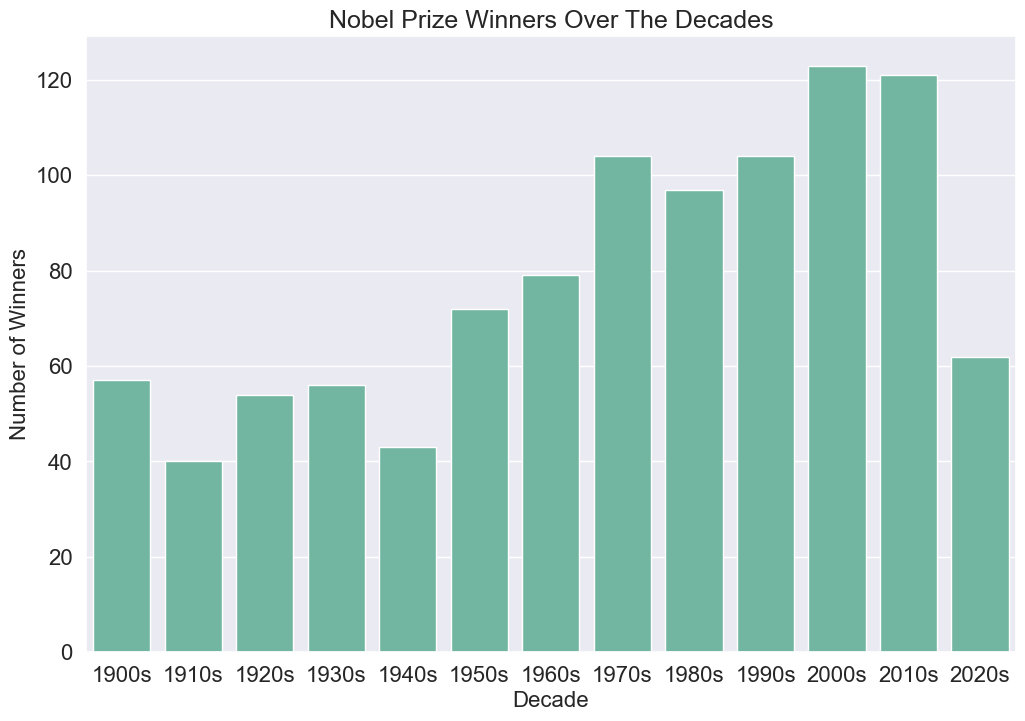

In [9]:
# Visualize total winners over the decades
# Set the theme and size of the plot
plt.figure(figsize=(12,8))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= nobel_decades, x= 'decade', y= 'counts')
plt.title('Nobel Prize Winners Over The Decades', fontsize= 18)

# Change labels and their settings
plt.xlabel('Decade', fontsize= 16)
plt.xticks(fontsize= 16)
plt.ylabel('Number of Winners', fontsize= 16)
plt.yticks(fontsize= 16)

# Show the plot
plt.show();

**Answer 2:** Looking at the bar chart above, we can observe that there are more Nobel Prize winners in the 2000s and 2010s. Additionally, two significant declines in the 1910s and 1940s stand out. I assume these decreases are due to the impact of World War I and World War II. Since many men were dramatically affected by the wars, and most Nobel Prize winners during that period were men, this could explain the drop in the number of winners during those decades.

### 3. Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [10]:
# Count the full_name in the data
prize_number = nobel['full_name'].value_counts().reset_index(name= 'prize_number').sort_values('prize_number', ascending= False)
# Filter them if the count is greater than 1
multiple_prize = prize_number[prize_number['prize_number'] > 1]
multiple_prize

,full_name,prize_number
0,International Committee of the Red Cross,3
2,Frederick Sanger,2
3,"Marie Curie, née Skłodowska",2
4,John Bardeen,2
5,Linus Carl Pauling,2
6,Office of the United Nations High Commissioner...,2
1,K. Barry Sharpless,2


In [11]:
# Filter winners who won multiple nobel from the nobel data
multiple_prize_full_data = nobel[nobel['full_name'].isin(multiple_prize['full_name'].tolist())]

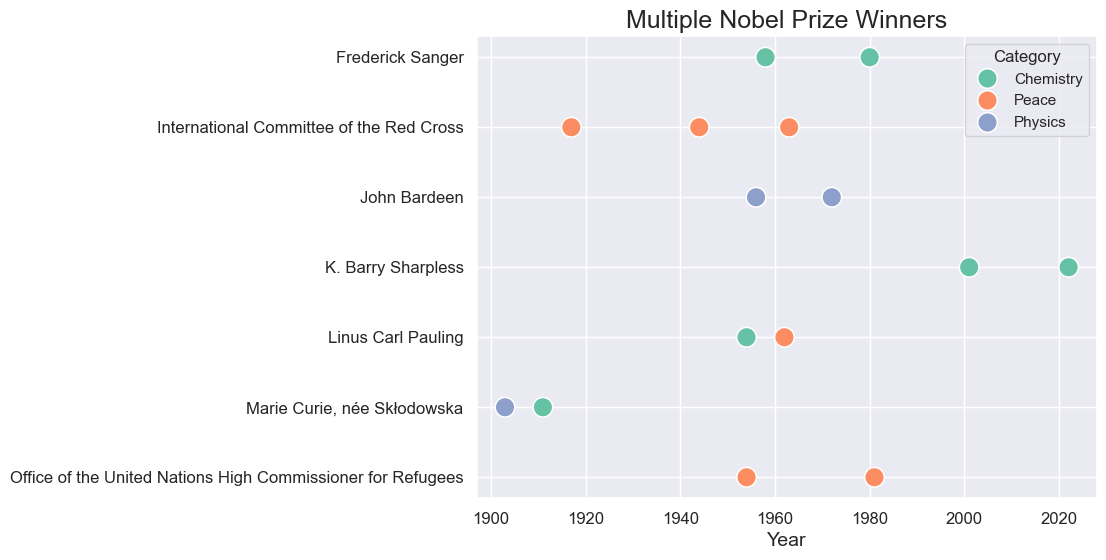

In [12]:
# Visualize multiple nobel prize winners
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title and legend
sns.scatterplot(data= multiple_prize_full_data, y= 'full_name', x= 'year', hue= 'category', s= 200)
plt.title('Multiple Nobel Prize Winners', fontsize= 18)
plt.legend(title= 'Category')

# Change labels and their settings
plt.xlabel('Year', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('')
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

**Answer 3:** There are two organizations and four individuals who have won the Nobel Prize more than once. Their names, the years they won, and the Nobel categories are displayed in the graph above.

### 4. What is the gender distribution of Nobel Prize winners by category?

In [13]:
# Find the ratio of male and female winners in the total
gender_ratio = nobel['gender'].value_counts(normalize= True)
gender_ratio

gender
male      0.932722
female    0.067278
Name: proportion, dtype: float64

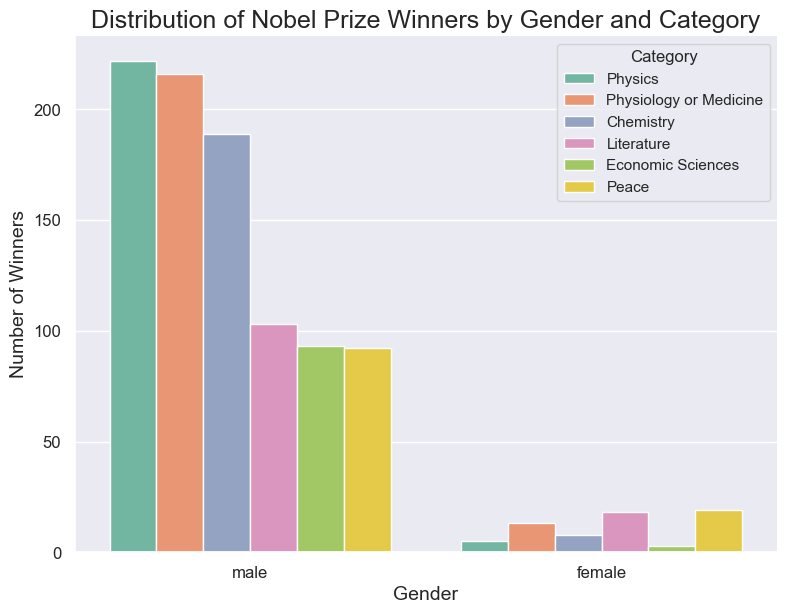

In [14]:
# Visualize winners by gender and category
# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create an order for categories to see clearly the difference (you can order by male or female)
cat_order = nobel[nobel['gender'] == 'male'].groupby(['category', 'gender'])['full_name'].count().reset_index(name= 'counts').sort_values('counts', ascending= False)['category']

# Create the plot, change the title and legend
sns.catplot(data= nobel, kind= 'count', x= 'gender', hue= 'category', height= 6, aspect= 1.33, legend_out= False, hue_order = cat_order)
plt.title('Distribution of Nobel Prize Winners by Gender and Category', fontsize= 18)
plt.legend(title= 'Category')

# Change labels and their settings
plt.xlabel('Gender', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('Number of Winners', fontsize= 14)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

**Answer 4:** The ratio of male winners is about 93%, which is significantly higher compared to female winners. Looking at the bar chart above, males have predominantly won Nobel Prizes in Physics, Medicine, and Chemistry. While male winners in Literature and Peace are fewer compared to the top three categories, female winners have primarily been awarded in these categories (Literature and Peace).

### 5. What is the distribution of Nobel Prize winners by birth-country and continent?

In [15]:
# Find the total number of winners for each birth_country_now and order by continent and counts
nobel_continent = nobel.groupby(['birth_continent', 'birth_country_now'])['birth_country_now'].count().reset_index(name= 'counts').sort_values(['birth_continent', 'counts'], ascending= [True, False])
nobel_continent

,birth_continent,birth_country_now,counts
10,Africa,South Africa,9
2,Africa,Egypt,6
0,Africa,Algeria,2
6,Africa,Liberia,2
1,Africa,Democratic Republic of the Congo,1
...,...,...,...
82,South America,Chile,2
83,South America,Colombia,2
81,South America,Brazil,1
84,South America,Peru,1


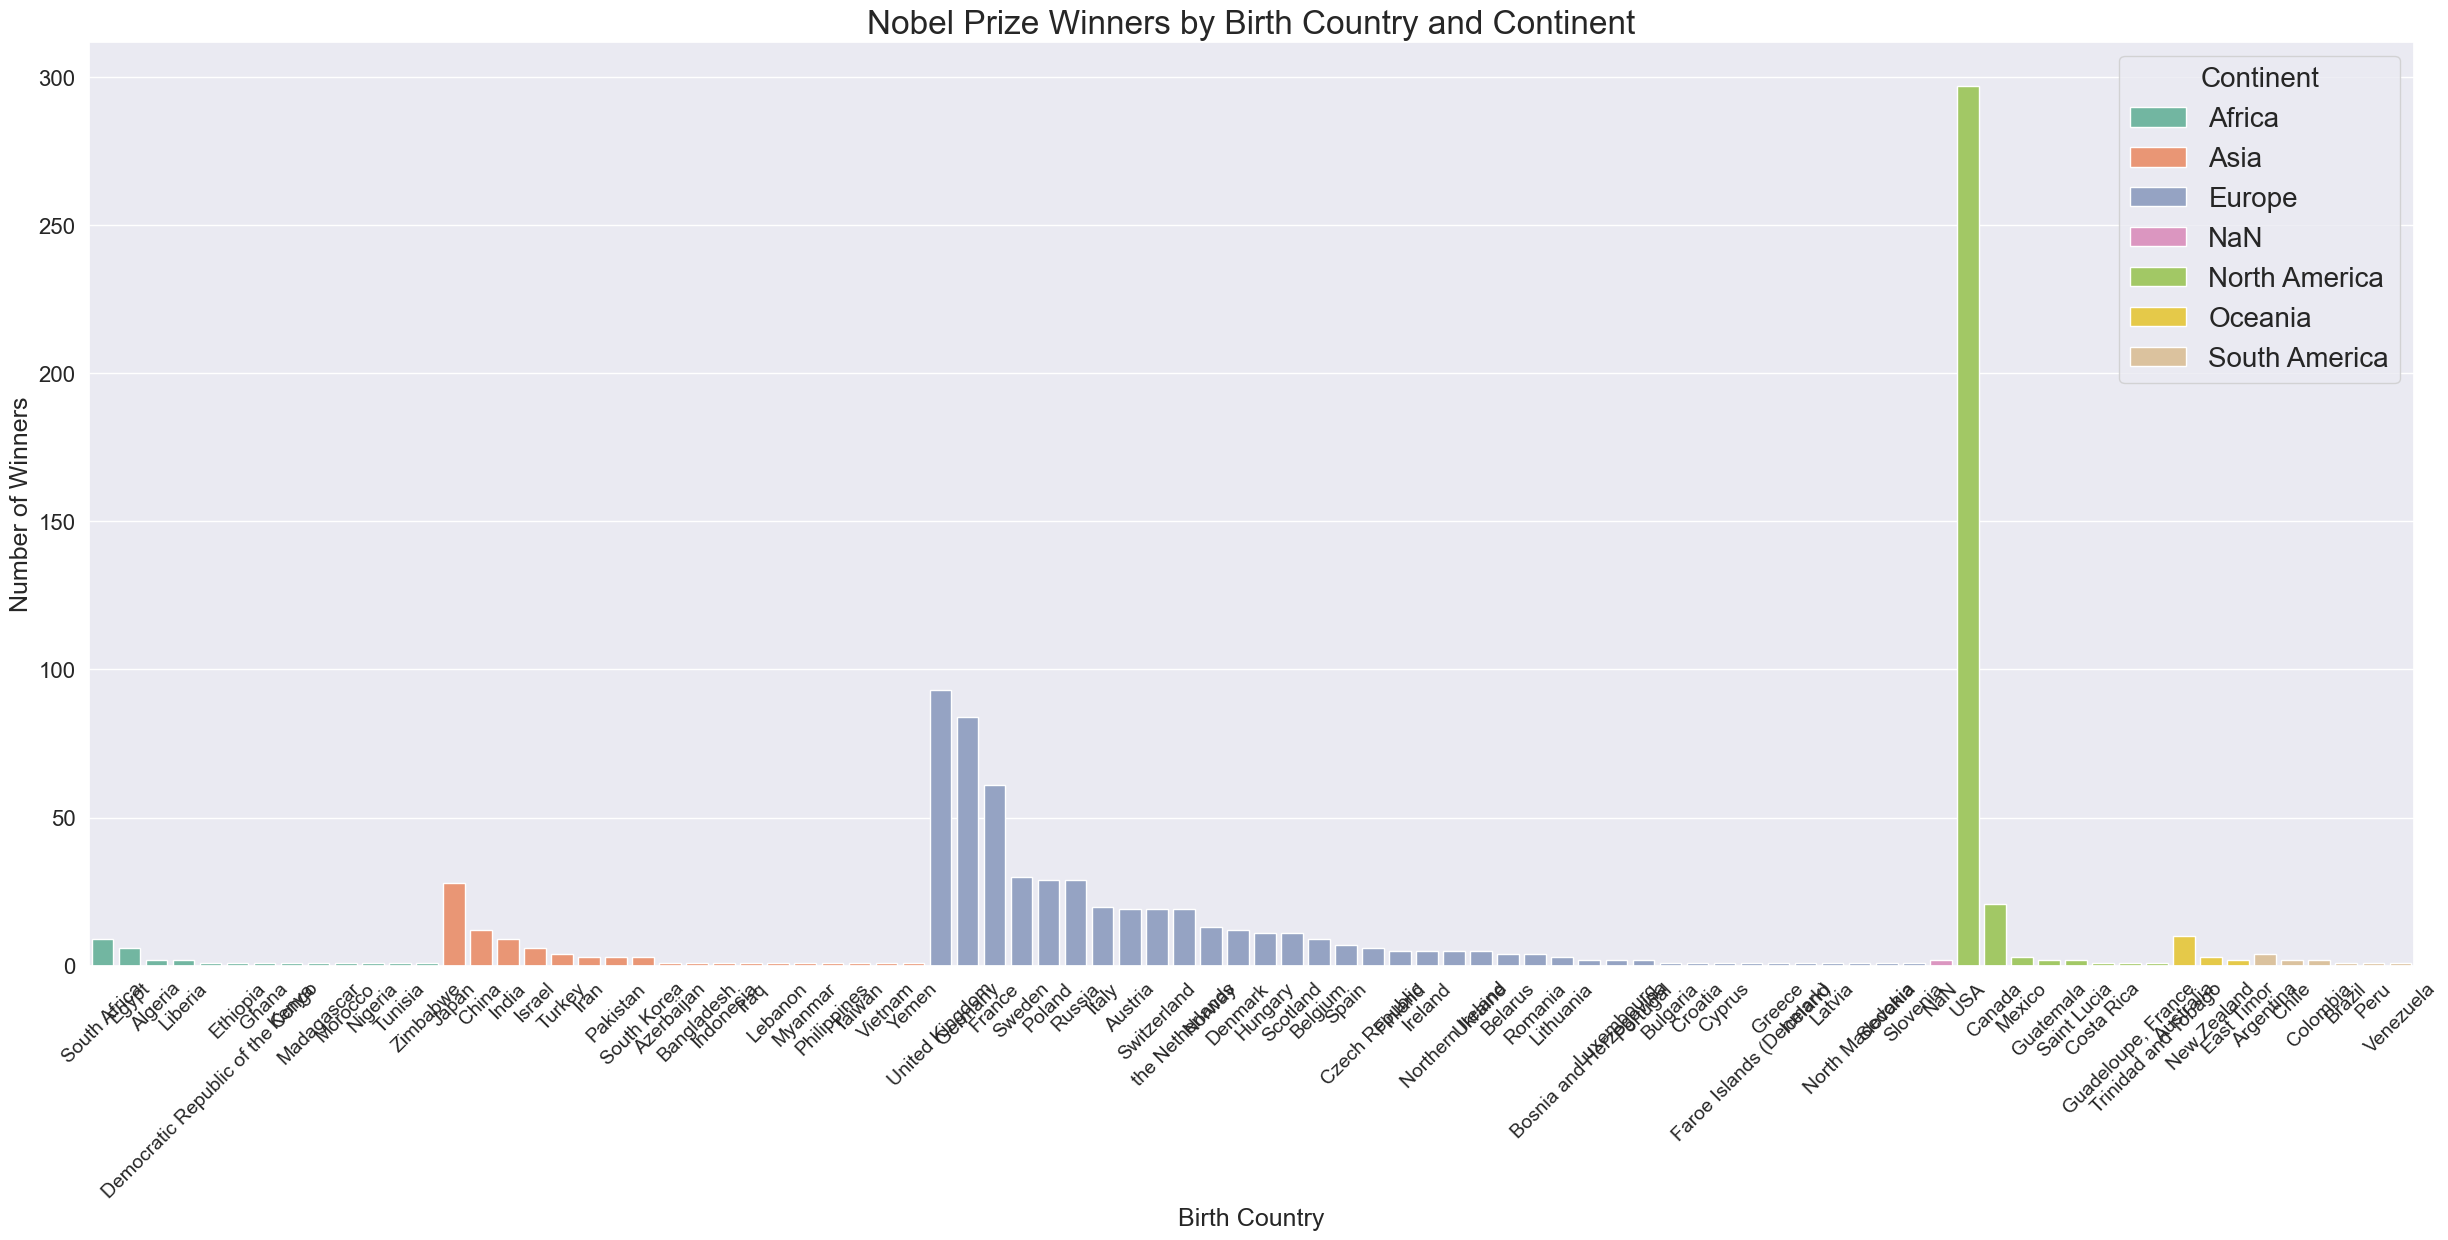

In [16]:
# Visualize winners by birth country and continent
# Set the theme and size of the plot
plt.figure(figsize=(30,12))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title and legend
sns.barplot(data= nobel_continent, x= 'birth_country_now', y= 'counts', hue= 'birth_continent')
plt.title('Nobel Prize Winners by Birth Country and Continent', fontsize= 24)
plt.legend(title= 'Continent', title_fontsize= 20, fontsize= 20)

# Change labels and their settings
plt.xlabel('Birth Country', fontsize= 18)
plt.xticks(fontsize= 14, rotation= 45)
plt.ylabel('Number of Winners', fontsize= 18)
plt.yticks(fontsize= 16)

# Show the plot
plt.show();

From the bar chart above, we can observe that the USA in North America, as well as the United Kingdom and Germany in Europe, stand out. However, it's difficult to draw further conclusions from this graph alone. Since the readability is limited, we can improve it by adding a new variable, `filter_continent`, to display results for a selected continent. This will allow us to explore the data at a more detailed, continent-specific level.

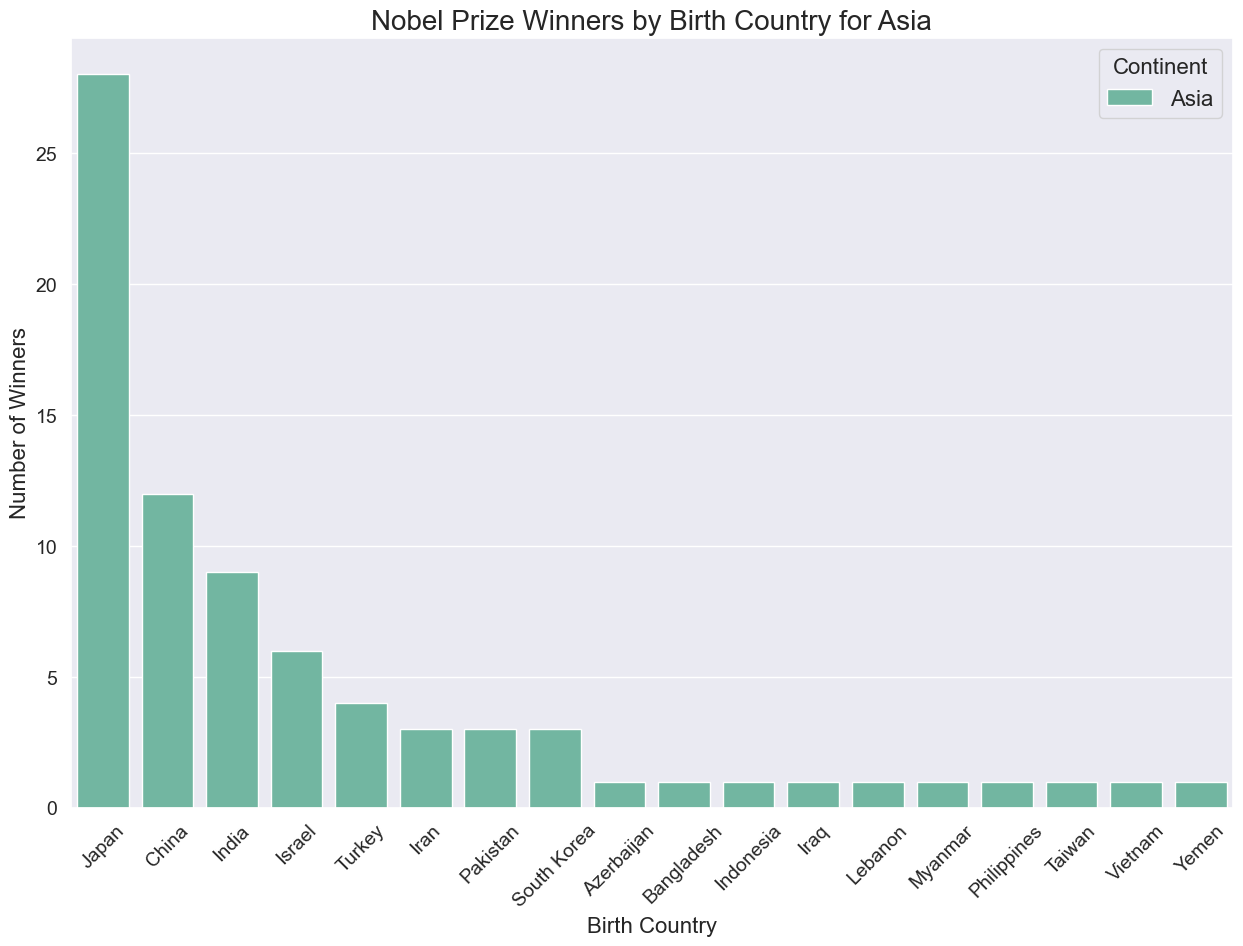

In [17]:
# Visualize winners by birth country and for one continent
# Set the theme and size of the plot
plt.figure(figsize=(15,10))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Add new variable to filter data, lets say we want to look at Asia
filter_continent = 'Asia'

# Create the plot, change the title and legend
sns.barplot(data= nobel_continent[nobel_continent['birth_continent'] == filter_continent], x= 'birth_country_now', y= 'counts', hue= 'birth_continent')
plt.title(f"Nobel Prize Winners by Birth Country for {filter_continent}", fontsize= 20)
plt.legend(title= 'Continent', title_fontsize= 16, fontsize= 16)

# Change labels and their settings
plt.xlabel('Birth Country', fontsize= 16)
plt.xticks(fontsize= 14, rotation= 45)
plt.ylabel('Number of Winners', fontsize= 16)
plt.yticks(fontsize= 14)

# Show the plot
plt.show();

**Answer 5:** When we take a closer look at Asia, Russia and Japan emerge as the most prominent countries with Nobel Prize winners. Additionally, there are more than five Nobel Prize winners from China, India, and Israel. In total, Nobel Prize winners were born in 18 different countries across Asia (note: after standardizing birth countries, there may be slight differences compared to the original data).

### 6. What is the distribution of Nobel Prize winners by gender and continent?

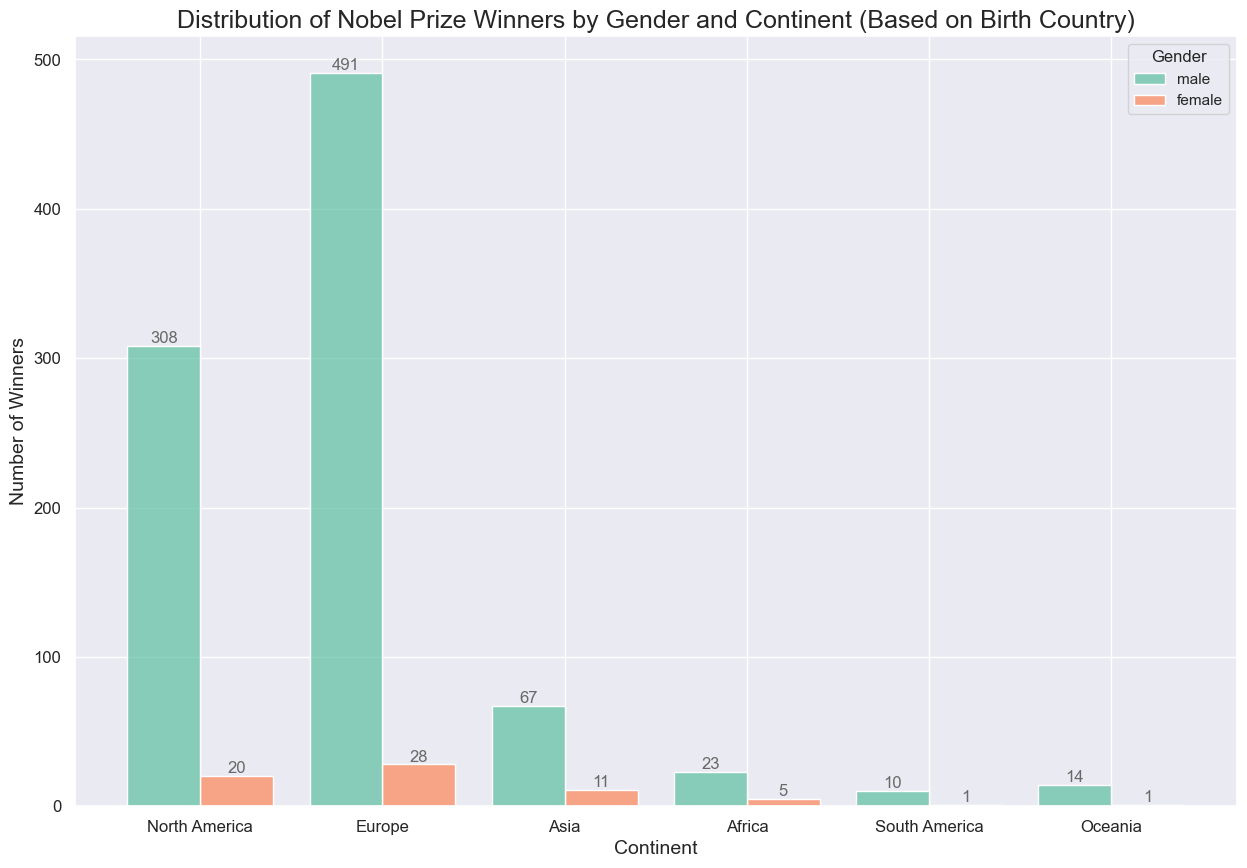

In [18]:
# Visualize winners by gender and continent
# Set the theme and size of the plot
plt.figure(figsize=(15,10))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title and legend
ax = sns.histplot(data= nobel[nobel['birth_continent'] != 'NaN'], x= 'birth_continent', hue= 'gender', multiple= 'dodge', shrink= 0.8)
plt.title('Distribution of Nobel Prize Winners by Gender and Continent (Based on Birth Country)', fontsize= 18)
ax.legend_.set_title('Gender')

# Loop through containers and add annotations
for container in ax.containers:
    ax.bar_label(container, fontsize=12, color='dimgray', label_type='edge')

# Change labels and their settings
plt.xlabel('Continent', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('Number of Winners', fontsize= 14)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

**Answer 6:** As we already know, the ratio of male winners is significantly higher than that of female winners (93% to 7%). Looking at the graph above, Europe and North America have a higher number of female winners compared to other continents. However, the male-to-female ratio remains fairly consistent across all continents.